Campaign for selling personal loans.
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.
The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

1. Read the column description and ensure you understand each attribute well 
2. Study the data distribution in each attribute, share your findings. (5 points)
 3. Get the target column distribution. Your comments 
4. Split the data into training and test set in the ratio of 70:30 respectively 
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
6. Print the confusion matrix for all the above models (5 points)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)


In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
#Fetching the data into a dataframe
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
#Observing the datasheet
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
#dropping the ID column as it does not contains much relevant information
df = df.drop(labels = "ID", axis = 1) 
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# Checking datatypes for all the columns to find any unknown datatypes
df.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [8]:
# checking for na values if present in all the columns
df.isna().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
# checking for null values in all the columns
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
# Checking the statistical values using describe function in order to identify outliers and invalid values
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [11]:
# Target column is Personal Loan, so checking its unique counts
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [12]:
# Moving the target column i.e 'Personal Loan' at the end in order to ease the calculations
target_col=['Personal Loan']
df = df[[c for c in df if c not in target_col] 
        + [c for c in target_col if c in df]]

In [13]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [14]:
# Checking if any non-numeric data present or not
df[~df.applymap(np.isreal).all(1)]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan


In [15]:
#ALl data are numeric
# Experience can never be negetive, hence converting the negative values to positive

df['Experience']=df['Experience'].abs()

In [16]:
# Again checking the statistical values, now we find the min value for experience is 0 indicating all values are positive
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


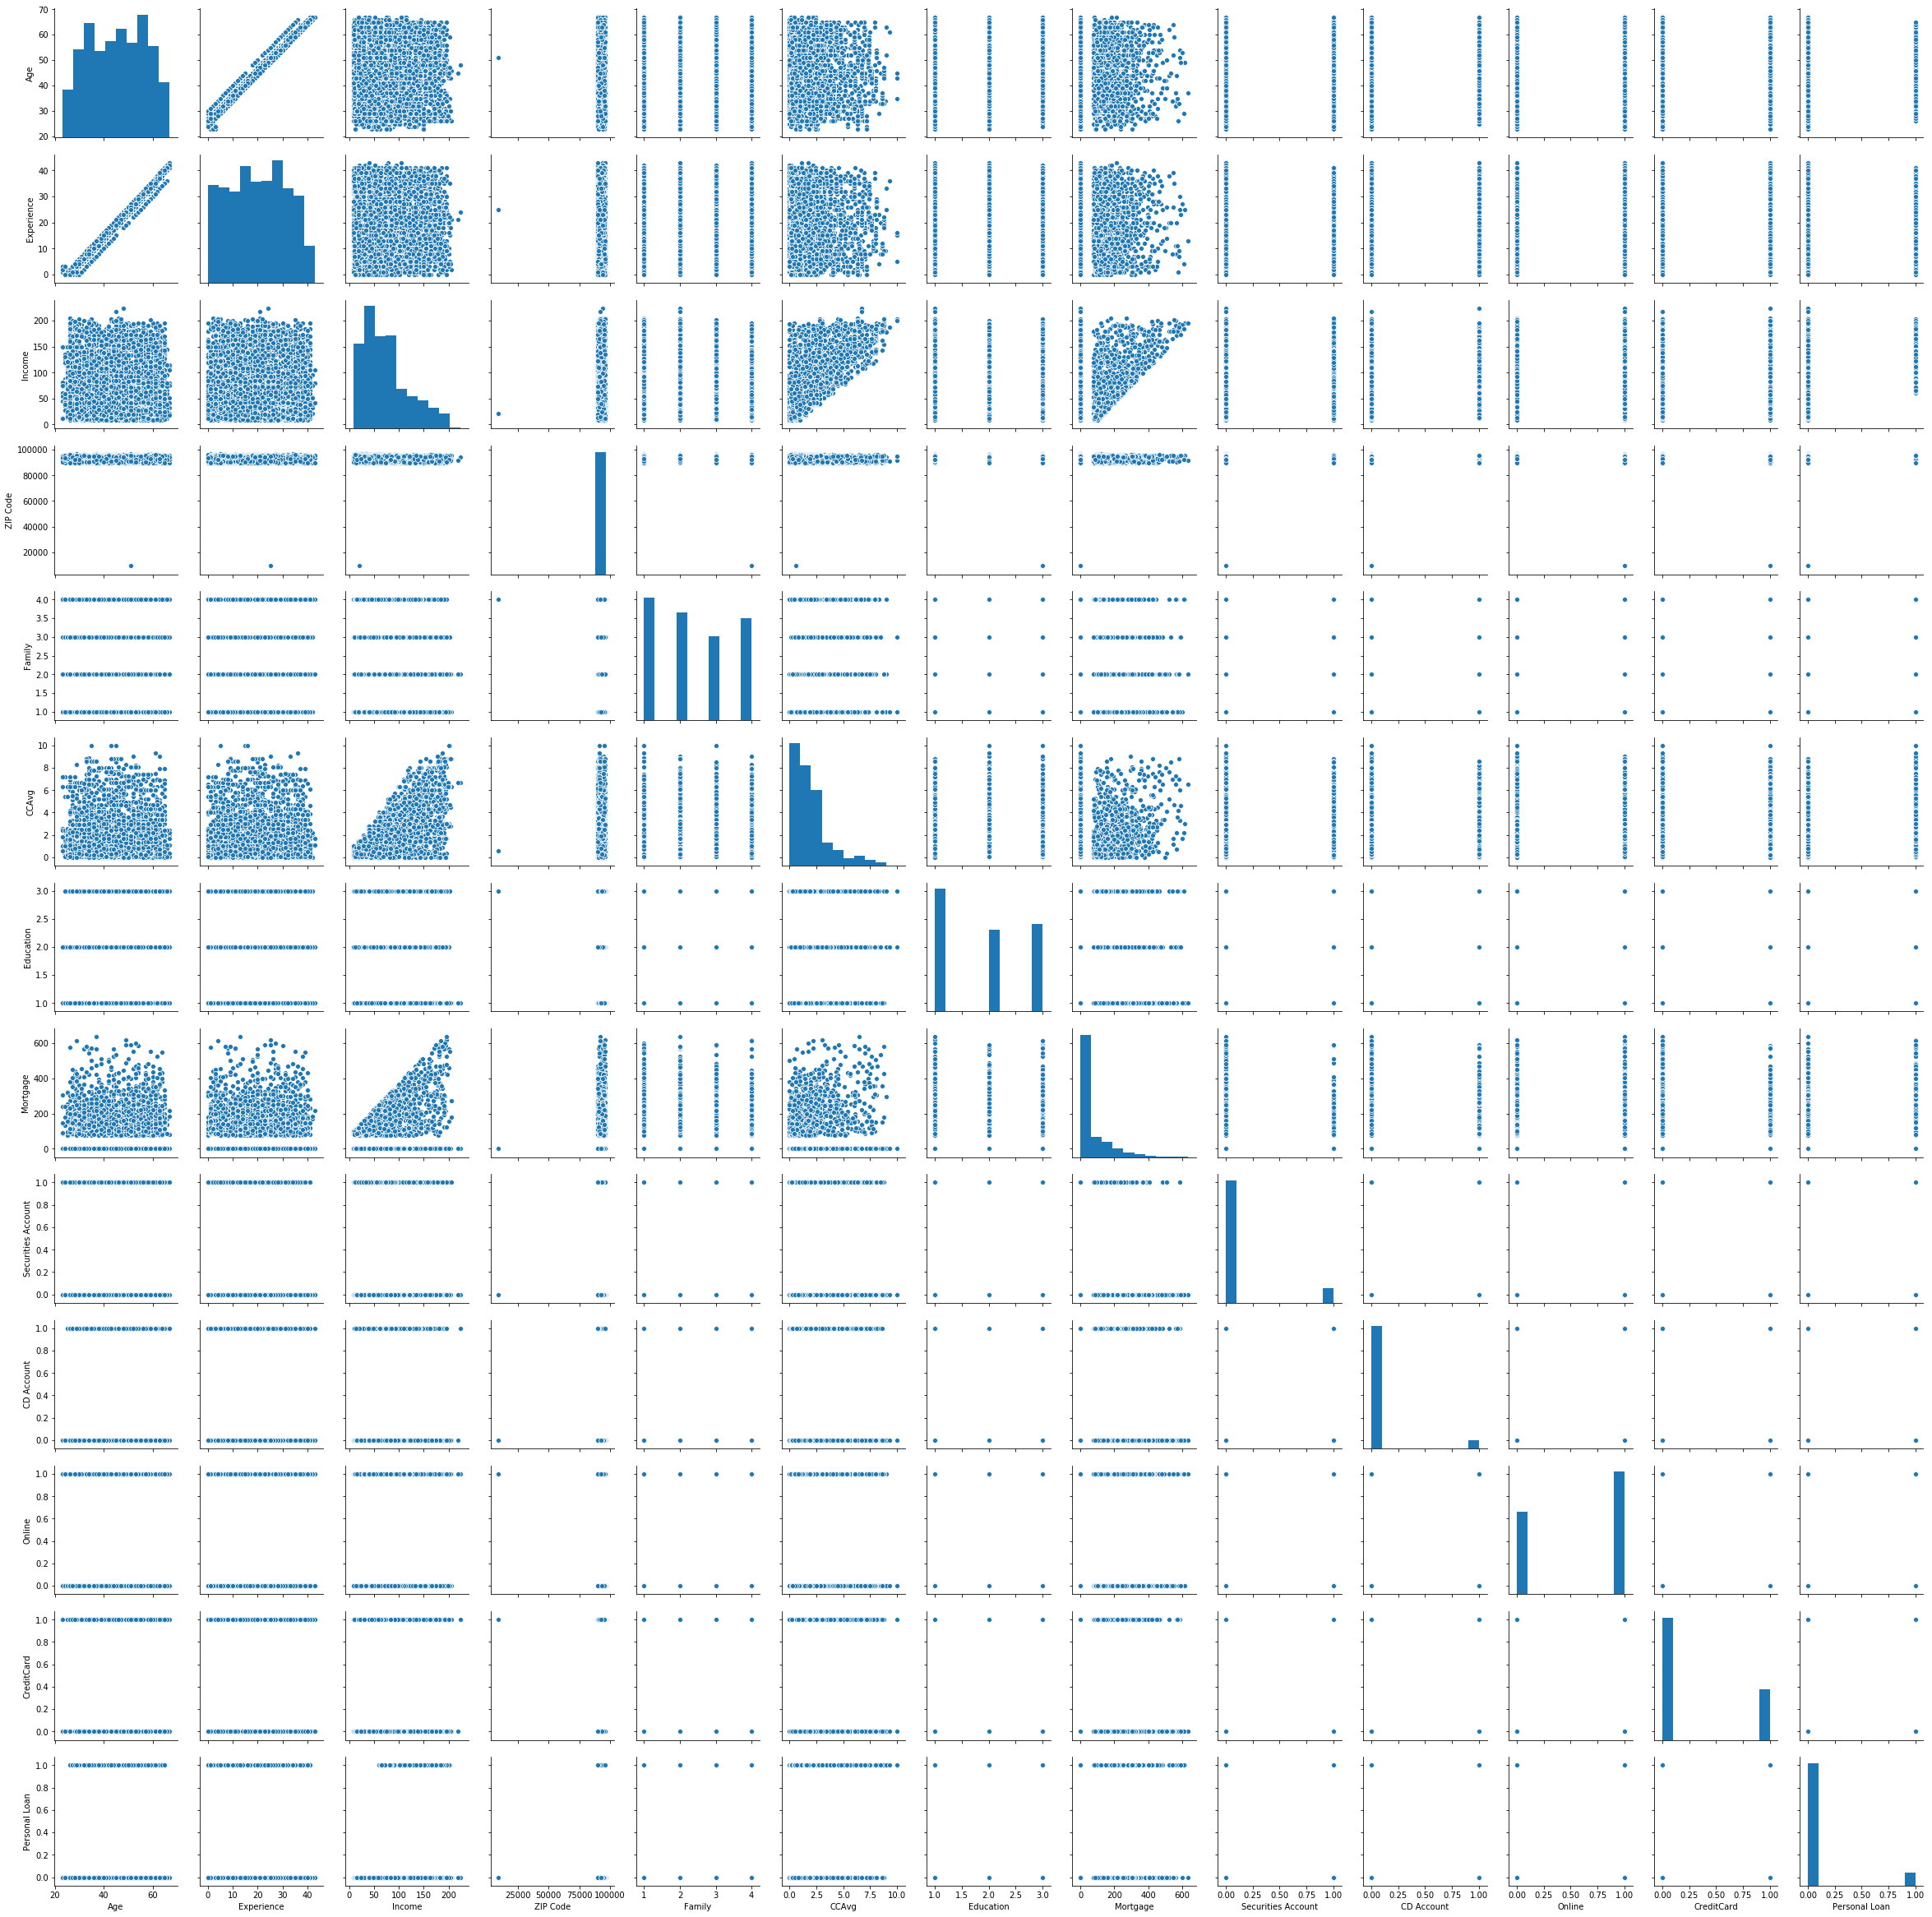

In [17]:
# Using pairplot to study the pairpanels
sns.pairplot(df)

In [18]:
#Breaking the dataset into two parts, X denotes the independent variables or features, y denotes the target variable
X = df.iloc[:,0:12]
y = df.iloc[:,12]

# Finding out the best model

# Logistic Regression

In [19]:
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [20]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

t=list(X_train.columns)

coef_df = pd.DataFrame(model.coef_, columns= t)
coef_df['intercept'] = model.intercept_
print(coef_df)

        Age  Experience    Income  ZIP Code    Family     CCAvg  Education  \
0 -0.000437   -0.002548  0.036085 -0.000066  0.015141  0.009439    0.01642   

   Mortgage  Securities Account  CD Account    Online  CreditCard  intercept  
0  0.000833            0.000533    0.004674 -0.000176   -0.000067  -0.000105  


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

0.9073333333333333
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.29      0.38       149

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.75      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500

[[1318   33]
 [ 106   43]]


In [22]:
# Building LR model with different iterations
ac_score = [] # Array containing all the scores
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    # Fitting the mode
    model.fit(X_train, y_train)
    
    #Prediction on test set
    prediction = model.predict(X_test)
    
    # Accuracy on test set
    accuracy =  model.score(X_test, y_test)
    ac_score.append(accuracy)
print(ac_score)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

[0.906, 0.9086666666666666, 0.9013333333333333, 0.91, 0.918, 0.908, 0.9, 0.9113333333333333, 0.9053333333333333, 0.9086666666666666]


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
# So we get the overall scores for all the iterations. The recall value for accepting the loan i.e 1 is very low. The reason is that the the class 0 is dominant class containing 4250 records wheres the class 1 contains only 480 records

# Naive Bayes

In [24]:
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB

In [25]:
test_size = 0.30 # taking 70:30 training and test set

In [26]:
model = GaussianNB()
seed =1 # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed)
    
# Fitting the mode
model.fit(X_train, y_train)

#Prediction on test set
prediction = model.predict(X_test)

# Accuracy on test set
accuracy =  model.score(X_test, y_test)
expected=y_test
print("Classification report")
print(metrics.classification_report(expected, prediction))
print("Confusion matrix")
print(metrics.confusion_matrix(expected, prediction))
print("Overall score ",accuracy)

Classification report
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.44      0.57      0.49       149

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500

Confusion matrix
[[1241  110]
 [  64   85]]
Overall score  0.884


In [27]:


for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=(i+1))
    
    # Fitting the mode
    model.fit(X_train, y_train)
    
    #Prediction on test set
    prediction = model.predict(X_test)
    
    # Accuracy on test set
    accuracy =  model.score(X_test, y_test)
    expected=y_test
    print("Iteration ",i)
    print()
    print("Seed ",(i+1))
    print("Classification report")
    print(metrics.classification_report(expected, prediction))
    print("Confusion matrix")
    print(metrics.confusion_matrix(expected, prediction))
    print("Overall score ",accuracy)
    print("----------------------------------------------------")

Iteration  0

Seed  1
Classification report
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.44      0.57      0.49       149

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500

Confusion matrix
[[1241  110]
 [  64   85]]
Overall score  0.884
----------------------------------------------------
Iteration  1

Seed  2
Classification report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1362
           1       0.43      0.52      0.47       138

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.69      0.73      0.71      1500
weighted avg       0.90      0.89      0.90      1500

Confusion matrix
[[1267   95]
 [  66   72]]
Overall score  0.8926666666666667
----------------------------------------------------
Iteration

In [28]:
#Compared to LR model here we find better recall value for class 1 i.e person accepting loan.

# Support Vector Machine

In [29]:
# Importing SVC
from sklearn.svm import SVC

In [30]:
# Building the model with Kernel = 'linear'

In [31]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
# gamma is a measure of influence of a data point. It is inverse of distance of influence. C is complexity of the model
# lower C value creates simple hyper surface while higher C creates complex surface
seed =1 # Random numbmer seeding for reapeatability of the code
test_size = 0.30 # taking 70:30 training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed)

# Fitting the mode
svc_model.fit(X_train, y_train)

#Prediction on test set
prediction = svc_model.predict(X_test)

# Accuracy on test set
accuracy =  svc_model.score(X_test, y_test)
expected=y_test
print("Classification report")
print(metrics.classification_report(expected, prediction))
print("Confusion matrix")
print(metrics.confusion_matrix(expected, prediction))
print("Overall score ",accuracy)


Classification report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.58      0.30      0.39       149

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.75      0.64      0.67      1500
weighted avg       0.89      0.91      0.90      1500

Confusion matrix
[[1319   32]
 [ 105   44]]
Overall score  0.9086666666666666


In [32]:

svc_model = SVC(C= .1, kernel='linear', gamma= 1)
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=(i+1))
    
    # Fitting the mode
    svc_model.fit(X_train, y_train)
    
    #Prediction on test set
    prediction = svc_model.predict(X_test)
    
    # Accuracy on test set
    accuracy =  svc_model.score(X_test, y_test)
    expected=y_test
    print("Iteration ",i)
    print()
    print("Seed ",(i+1))
    print("Classification report")
    print(metrics.classification_report(expected, prediction))
    print("Confusion matrix")
    print(metrics.confusion_matrix(expected, prediction))
    print("Overall score ",accuracy)
    print("----------------------------------------------------")

Iteration  0

Seed  1
Classification report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.58      0.30      0.39       149

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.75      0.64      0.67      1500
weighted avg       0.89      0.91      0.90      1500

Confusion matrix
[[1319   32]
 [ 105   44]]
Overall score  0.9086666666666666
----------------------------------------------------
Iteration  1

Seed  2
Classification report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1362
           1       0.47      0.25      0.32       138

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.70      0.61      0.64      1500
weighted avg       0.88      0.90      0.89      1500

Confusion matrix
[[1323   39]
 [ 104   34]]
Overall score  0.9046666666666666
-------------------------------------------------

In [33]:
# Building the model with Kernel = 'rbf'

In [34]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='rbf', gamma= 1)
# gamma is a measure of influence of a data point. It is inverse of distance of influence. C is complexity of the model
# lower C value creates simple hyper surface while higher C creates complex surface
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=(i+1))
    
    # Fitting the mode
    svc_model.fit(X_train, y_train)
    
    #Prediction on test set
    prediction = svc_model.predict(X_test)
    
    # Accuracy on test set
    accuracy =  svc_model.score(X_test, y_test)
    expected=y_test
    print("Iteration ",i)
    print()
    print("Seed ",(i+1))
    print("Classification report")
    print(metrics.classification_report(expected, prediction))
    print("Confusion matrix")
    print(metrics.confusion_matrix(expected, prediction))
    print("Overall score ",accuracy)
    print("----------------------------------------------------")

Iteration  0

Seed  1
Classification report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.00      0.00      0.00       149

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500

Confusion matrix
[[1351    0]
 [ 149    0]]
Overall score  0.9006666666666666
----------------------------------------------------


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration  1

Seed  2
Classification report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1362
           1       0.00      0.00      0.00       138

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.45      0.50      0.48      1500
weighted avg       0.82      0.91      0.86      1500

Confusion matrix
[[1362    0]
 [ 138    0]]
Overall score  0.908
----------------------------------------------------


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration  2

Seed  3
Classification report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1349
           1       0.00      0.00      0.00       151

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500

Confusion matrix
[[1349    0]
 [ 151    0]]
Overall score  0.8993333333333333
----------------------------------------------------


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration  3

Seed  4
Classification report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1352
           1       0.00      0.00      0.00       148

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500

Confusion matrix
[[1352    0]
 [ 148    0]]
Overall score  0.9013333333333333
----------------------------------------------------


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration  4

Seed  5
Classification report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.00      0.00      0.00       149

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500

Confusion matrix
[[1351    0]
 [ 149    0]]
Overall score  0.9006666666666666
----------------------------------------------------


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
# For all the iterations we study for kernel linear and rbf, we find that the performance of kernal linear is better than the kernel rbf. However the recall values for class 1 is very low. Hence Naive Bayes gave better result than SVM in this case.

# KNN

In [36]:
# importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [37]:
# choosing k value as 5 and assigning weight values based on the distance
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [38]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

df_z = df.apply(zscore)  # converting all attributes to Z scale 

df_z.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,2.478018e-17,1.0001,-1.948906,-0.901970,-0.029524,0.842923,1.889859
Experience,5000.0,1.001421e-16,1.0001,-1.764019,-0.887906,-0.011792,0.864321,2.003268
Income,5000.0,1.939449e-16,1.0001,-1.428969,-0.755483,-0.212348,0.526315,3.263712
ZIP Code,5000.0,1.513445e-15,1.0001,-39.519194,-0.585162,0.134093,0.686024,1.648959
Family,5000.0,7.850609e-16,1.0001,-1.216855,-1.216855,-0.345432,0.525991,1.397414
CCAvg,5000.0,-2.078338e-17,1.0001,-1.108987,-0.708412,-0.250611,0.321641,4.613525
Education,5000.0,-6.315837e-16,1.0001,-1.049078,-1.049078,0.141703,1.332484,1.332484
Mortgage,5000.0,2.810197e-16,1.0001,-0.555524,-0.555524,-0.555524,0.437558,5.688108
Securities Account,5000.0,5.092149e-16,1.0001,-0.341423,-0.341423,-0.341423,-0.341423,2.928915
CD Account,5000.0,4.426903e-16,1.0001,-0.253540,-0.253540,-0.253540,-0.253540,3.944146


In [39]:
X = df_z.iloc[:,0:12] #Fetching all featues/independent columns from z-score dataframe df_z
y = df.iloc[:,12] #Fetching only the target column from the original dataframe df

In [40]:
seed =1 # Random numbmer seeding for reapeatability of the code
test_size = 0.30 # taking 70:30 training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed)
# Fitting the mode
NNH.fit(X_train, y_train)

#Prediction on test set
predicted_labels = NNH.predict(X_test)

# Accuracy on test set
accuracy =  NNH.score(X_test, y_test)
expected=y_test
print("Classification report")
print(metrics.classification_report(expected, predicted_labels))
print("Confusion matrix")
print(metrics.confusion_matrix(expected, predicted_labels))
print("Overall score ",accuracy)

Classification report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.92      0.53      0.67       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.93      0.76      0.82      1500
weighted avg       0.95      0.95      0.94      1500

Confusion matrix
[[1344    7]
 [  70   79]]
Overall score  0.9486666666666667


In [41]:
# Building KNN model for different iterations
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=(i+1))
    
    # Fitting the mode
    NNH.fit(X_train, y_train)
    
    #Prediction on test set
    predicted_labels = NNH.predict(X_test)
    
    # Accuracy on test set
    accuracy =  NNH.score(X_test, y_test)
    expected=y_test
    print("Iteration ",i)
    print()
    print("Seed ",(i+1))
    print("Classification report")
    print(metrics.classification_report(expected, predicted_labels))
    print("Confusion matrix")
    print(metrics.confusion_matrix(expected, predicted_labels))
    print("Overall score ",accuracy)
    print("----------------------------------------------------")

Iteration  0

Seed  1
Classification report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.92      0.53      0.67       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.93      0.76      0.82      1500
weighted avg       0.95      0.95      0.94      1500

Confusion matrix
[[1344    7]
 [  70   79]]
Overall score  0.9486666666666667
----------------------------------------------------
Iteration  1

Seed  2
Classification report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1362
           1       0.99      0.49      0.65       138

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.97      0.74      0.81      1500
weighted avg       0.95      0.95      0.94      1500

Confusion matrix
[[1361    1]
 [  71   67]]
Overall score  0.952
----------------------------------------------------
Iteration

In [42]:
# As per our analysis we find best result with KNN iteration 9. In this case the Overall accuracy is 96% and the recall value for class 1 is 64%.

In [43]:
#Note seed is the value of random_state

# Conclusion

The Bank_Personal_Loan_Modelling dataset contains all numeric type information where target column is 'Personal Loan' and the rest columns are independent columns. The column 'ID' is dropped as it does not contain relevant information. No null or NA values are present. Invalid values like negetive experience are rectified by converting the same to positive. On analysing the pairplot found that the independent columns are not normally distributed. There are very minimal or no dependencies among the independent variables. The relation between independent columns and target columns show overlapping in many cases. Logistic Regression, Naive Bayes, SVM and KNN models are used to analyse the dataframe. Among all the models KNN performed best. We get good overall score of 96% along with class 1 recall and precision value of 64% and 95% respectively for KNN. We also got satisfactory result from Naive Bayes. The reason behind getting high overall accuracy but low recall value for class 1 is due to lack of data available for class 1. Out of 5000 records available, Class 0 have 4520 records and only 480 records are present for class 1. So, for building a better model it is required that we have sufficient data for class 1. 